In [273]:
import json
import statistics as st
from matplotlib import pyplot as plt
import re

In [274]:
def initial_statistics(data: list[float]) -> dict:
    """Return a dict with the 'Mean', 'Median' and 'Standard Deviation'"""
    assert len(data) > 1, "The list must have more then one item"
    return {"Max": max(data), "Min": min(data), "Range": max(data)-min(data), "Mean": st.mean(data), "Median": st.median(data), "Standard Deviation": st.stdev(data)}

def scatter(x: list[float], y: list[float], title: str="", x_label: str="", y_label: str="") -> None:
    """Print a Scatter graphic"""
    assert len(x) > 1, "The 'x' list must have more then one item"
    assert len(y) > 1, "The 'y' list must have more then one item"
    assert len(x) == len(y), "Both lists must have the same lenght"
    
    plt.scatter(x, y)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

# TCEPB

In [275]:
with open("tcepb_posts_data.json", "r") as f:
    data_tce = json.load(f)
len(data_tce)

3428

In [276]:
links = [d["link"] for d in data_tce]
descriptions = [d["description"] for d in data_tce]
comments = [d["comments"] for d in data_tce]
likes = [d["likes"] for d in data_tce]
print(links[:5])
print(descriptions[:5])
print(comments[:5])
print(likes[:5])

['https://www.instagram.com/p/CsrvIK_JUuX/', 'https://www.instagram.com/p/CsrtLpCJuMh/', 'https://www.instagram.com/p/CspiMeONz3m/', 'https://www.instagram.com/p/Cspho-St8YC/', 'https://www.instagram.com/p/CsmRI1eJ8A3/']
['Busca Ativa Escolar no Selo UNICEF: municípios têm até 31 de maio para rematricular 40% dos estudantes em situação de evasão escolar\n\nO Tribunal de Contas do Estado da Paraíba (TCE-PB) alerta os 207 municípios paraibanos participantes do Selo Unicef a comprovarem que rematricularam pelo menos 40% dos estudantes que estavam em situação de evasão ou abandono escolar de acordo com o Censo Escolar/INEP de 2019. A recomendação é da Associação dos Tribunais de Contas do Brasil (Atricon) para que as Cortes de Contas orientem mais de dois mil municípios brasileiros participantes do Selo Unicef.\n\nO percentual é uma das diversas metas previstas pela metodologia do Selo e deve ser registrado até o dia 31 de maio, próxima quarta-feira, no site plataforma.buscaativaescolar.or

In [277]:
likes = [int(l.split(" ")[0]) for l in likes]
print(likes[:5])

[53, 53, 52, 102, 74]


In [278]:
comments_count = [len(c) for c in comments]
print(comments_count[:5])

[0, 0, 1, 0, 3]


## LIKES

In [279]:
likes_stats = initial_statistics(likes)
likes_stats

{'Max': 387,
 'Min': 0,
 'Range': 387,
 'Mean': 42.80805134189031,
 'Median': 31.0,
 'Standard Deviation': 40.535061925952604}

## COMMENTS

In [280]:
comments_stats = initial_statistics(comments_count)
comments_stats

{'Max': 15,
 'Min': 0,
 'Range': 15,
 'Mean': 0.9051925320886814,
 'Median': 0.0,
 'Standard Deviation': 2.06787280080708}

## LIKES X COMMENTS

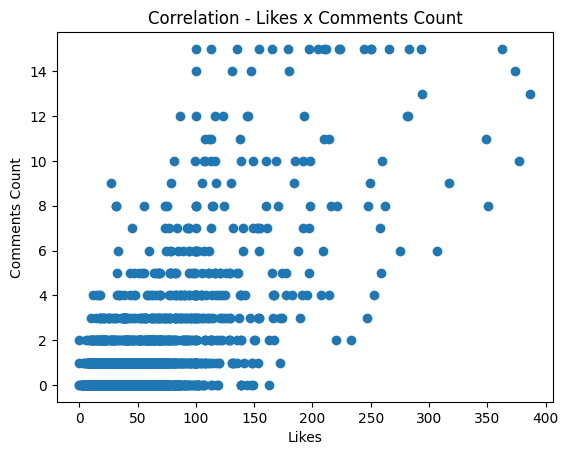

In [281]:
scatter(x=likes, y=comments_count, title="Correlation - Likes x Comments Count", x_label="Likes", y_label="Comments Count")

# PREF JAMPA

In [282]:
with open("prefjoaopessoa_posts_data.json", "r") as f:
    data_perfjampa = json.load(f)
len(data_perfjampa)

3165

In [283]:
links = [d["link"] for d in data_perfjampa]
descriptions = [d["description"] for d in data_perfjampa]
comments = [d["comments"] for d in data_perfjampa]
likes = [d["likes"] for d in data_perfjampa]
print(links[:5])
print(descriptions[:5])
print(comments[:5])
print(likes[:5])

['https://www.instagram.com/p/CstK0_uuKav/', 'https://www.instagram.com/p/CsreBh1rdEd/', 'https://www.instagram.com/p/Csq_EVErRAE/', 'https://www.instagram.com/p/CsqpONUrzsW/', 'https://www.instagram.com/p/CspA1KzOLYn/']
['Me chama de sexta e diz que esperou por mim! Agora confere a nossa programação cultural deste final de semana que tá massa demais:\n\n⭐️ Sexta (26)\n\nAbertura da I Festival e Feira de Cordel - Feira de Artesanato de Tambaú - 16h\nDeclamação de poetas cordelistas e show de Beto Brito.\n\n⭐️ Sábado (27)\n\nSabadinho Bom - Praça Rio Branco - 12h\nO Sanfoneiro Ivan Martins e seus convidados prometem muito choro e forró com grandes clássicos de compositores brasileiros\n\nSábado Inclusivo - Parque Arruda Câmara (Bica) - das 9h às 11h e das 14h às 16h\nAtividades de lazer, de terapia e diversão para grupos de idosos, PCDs e outras grupos específicos que podem agendar previamente\n\nPré-Junino - Ginásio Guarani (Roger) - 19h\nApresentações das Juninas:\nFogueira Nordestina

In [284]:
likes = [int(re.sub("(,)|(\.)", "", l.split(" ")[0])) for l in likes]
print(likes[:5])

[3092, 495, 771, 794, 2220]


In [285]:
comments_count = [len(c) for c in comments]
print(comments_count[:5])

[15, 10, 11, 15, 15]


## LIKES

In [286]:
likes_stats = initial_statistics(likes)
likes_stats

{'Max': 39000,
 'Min': 21,
 'Range': 38979,
 'Mean': 1018.8862559241707,
 'Median': 544,
 'Standard Deviation': 1540.4008166900783}

## COMMENTS

In [287]:
comments_stats = initial_statistics(comments_count)
comments_stats

{'Max': 15,
 'Min': 0,
 'Range': 15,
 'Mean': 10.670142180094787,
 'Median': 13,
 'Standard Deviation': 4.921238975924683}

## LIKES X COMMENTS

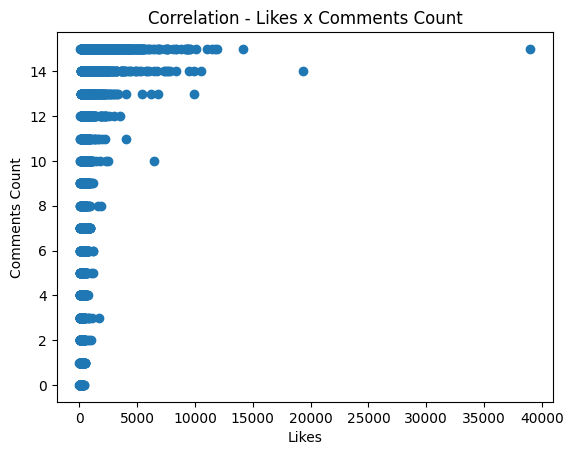

In [288]:
scatter(x=likes, y=comments_count, title="Correlation - Likes x Comments Count", x_label="Likes", y_label="Comments Count")

Removing the 3 most distant dots

In [289]:
indexes = [likes.index(h) for h in sorted(likes)[-3:]]
indexes

[314, 1879, 484]

In [290]:
print(len(likes))
reduced_likes = [x for i, x in enumerate(likes) if i not in indexes]
print(len(reduced_likes))

3165
3162


In [291]:
print(len(likes))
reduced_comments_count = [x for i, x in enumerate(comments_count) if i not in indexes]
print(len(reduced_comments_count))

3165
3162


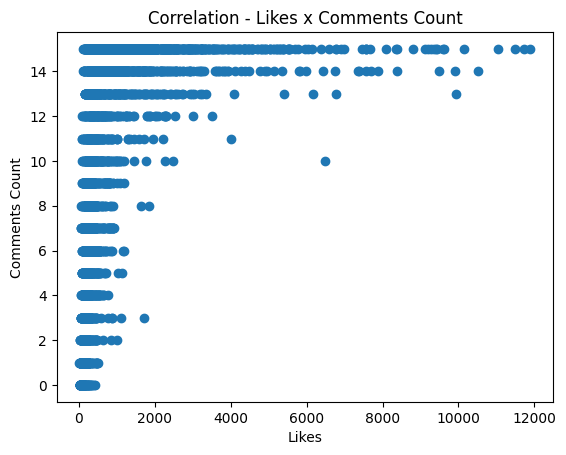

In [292]:
scatter(x=reduced_likes, y=reduced_comments_count, title="Correlation - Likes x Comments Count", x_label="Likes", y_label="Comments Count")